In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "tanvirahmedpalok"
os.environ['KAGGLE_KEY'] = "21fd2b0606fbe19a26ca5e75e3d04c2e"

In [ ]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

100% 777M/778M [00:30<00:00, 29.2MB/s]
100% 778M/778M [00:30<00:00, 27.0MB/s]


In [ ]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [ ]:
len(os.listdir("/content/COVID-19_Radiography_Dataset/COVID/images"))

3616

In [ ]:
len(os.listdir("/content/COVID-19_Radiography_Dataset/Normal/images"))

10192

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img =cv2.imread("/content/COVID-19_Radiography_Dataset/Normal/images/Normal-1.png")

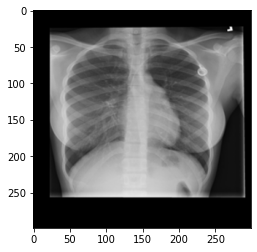

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(299, 299, 3)

In [ ]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path +'/'+ urls[i]
    img = cv2.imread(img_path)
    img = cv2.resize(img,(100,100))
    images.append(img)
    labels.append(target)

  return images, labels

In [ ]:
covid_path = "/content/COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path,covidUrl, 1)

In [ ]:
normal_path = '/content/COVID-19_Radiography_Dataset/Normal/images'
normalUrl = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normalUrl, 0)

In [ ]:
covidImages =np.asarray(covidImages)
normalImages= np.asarray(normalImages)

In [ ]:
covidImages.shape

(3616, 100, 100, 3)

In [ ]:
normalImages.shape

(10192, 100, 100, 3)

In [ ]:
data = np.r_[covidImages, normalImages]

In [ ]:
data.shape

(13808, 100, 100, 3)

In [ ]:
targets = np.r_[covidTargets, normalTargets]

In [ ]:
targets.shape

(13808,)

In [ ]:
img = img/255.0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size = 0.25)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential([
    Conv2D(32, 3, input_shape = (100, 100, 3), activation = 'relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 10, 16)      

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics= ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size = 32,epochs = 5, validation_data = (X_test, y_test))

Epoch 1/5
324/324 [==============================] - 118s 365ms/step - loss: 0.2612 - accuracy: 0.8881 - val_loss: 0.2244 - val_accuracy: 0.9047
Epoch 2/5
324/324 [==============================] - 119s 368ms/step - loss: 0.2099 - accuracy: 0.9133 - val_loss: 0.2520 - val_accuracy: 0.8914
Epoch 3/5
324/324 [==============================] - 116s 358ms/step - loss: 0.1795 - accuracy: 0.9259 - val_loss: 0.2000 - val_accuracy: 0.9195
Epoch 4/5
324/324 [==============================] - 117s 363ms/step - loss: 0.1548 - accuracy: 0.9373 - val_loss: 0.1868 - val_accuracy: 0.9241
Epoch 5/5
324/324 [==============================] - 116s 358ms/step - loss: 0.1217 - accuracy: 0.9537 - val_loss: 0.1541 - val_accuracy: 0.9421


In [ ]:
loss_test, pred_test = model.evaluate(X_test, y_test)
print("Testing accuracy (%) =", pred_test*100)

108/108 [==============================] - 10s 88ms/step - loss: 0.1541 - accuracy: 0.9421
Testing accuracy (%) = 94.20625567436218
